In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.











In [23]:
#여러개의 객체를 검출하기 위한 numpy
import numpy as np

In [5]:
options={
    'model':'cfg/yolo.cfg',
    'load':'bin/yolov2.weights',
    'threshold':0.3
}
tfnet=TFNet(options)

Parsing cfg/yolo.cfg
Loading bin/yolov2.weights ...
Successfully identified 203934260 bytes
Finished in 0.018899917602539062s
Model has a coco model name, loading coco labels.

Building net ...

Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------



       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)



C:\Users\seoeu\anaconda3\envs\YOLOdark2\darkflow-master\darkflow\dark\darknet.py:54: UserWarning: ./cfg/yolov2.cfg not found, use cfg/yolo.cfg instead
  cfg_path, FLAGS.model))


 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 76, 76, 128)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 76, 76, 256)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 38, 38, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 38, 38, 256)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 38, 38, 512)
 Load  |  Ye

In [45]:
img = cv2.imread('dogscats.jpg',cv2.IMREAD_COLOR) #이미지 로드
#img = cv2.imread('dog.jpg',cv2.IMREAD_COLOR) #이미지 로드
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
results = tfnet.return_predict(img) #객체 예측

img.shape

(503, 800, 3)

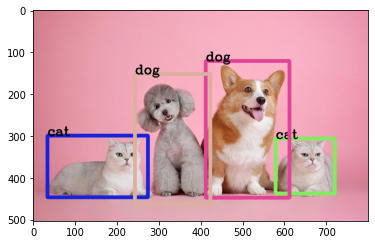

In [46]:
#여러 객체의 바운딩박스 컬러를 다르게 해주기 위한 코드
colors = [tuple(255*np.random.rand(3)) for _ in range(10)]

#for문을 이용한 다중 bbox, labeling
for color, result in zip(colors,results):
    t1 = (result['topleft']['x'],result['topleft']['y'])
    br = (result['bottomright']['x'], result['bottomright']['y'])
    label = result['label']
    
    
    img = cv2.rectangle(img, t1, br, color,7) #바운딩박스 생성
    img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2)  #labeling 작업
    
plt.imshow(img)
plt.show()

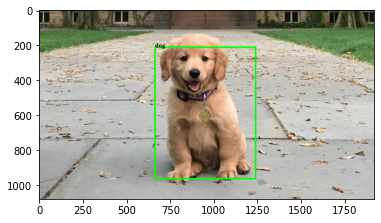

dog


In [44]:
#객체 한개인 경우

t1 = (results[0]['topleft']['x'],results[0]['topleft']['y'])
br = (results[0]['bottomright']['x'], results[0]['bottomright']['y'])
label = results[0]['label']

img = cv2.rectangle(img, t1, br, (0,255,0),7) #바운딩박스 생성

#labeling 작업
img = cv2.putText(img, label, t1, cv2.FONT_HERSHEY_COMPLEX, 1, (0,0,0), 2) 
plt.imshow(img)
plt.show()
print(label)